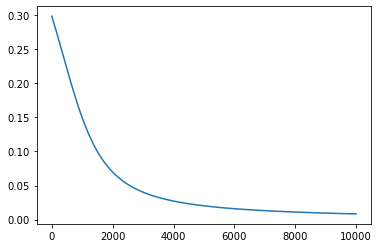

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

x1 = 0.05
x2 = 0.10
o1 = 0.01 
o2 = 0.99
w = [0.15, 0.20, 0.25, 0.3, 0.4, 0.45, 0.5, 0.55]
hidden = [0, 0, 0, 0]
b1 = 0.35
b2 = 0.60
n = 0.01

def squaredErrorFunction(w):
    def output(weight1, weight2, input1, input2, bias):
        net = weight1 * input1 + weight2 * input2 + bias
        return sigmoid(net)
    
    def sigmoid(net):
        return 1/(1+math.exp(-net))

    
    hidden[0] = output(w[0], w[1], x1, x2, b1)
    hidden[1] = output(w[2], w[3], x1, x2, b1)
    hidden[2] = output(w[4], w[5], hidden[0], hidden[1], b2)
    hidden[3] = output(w[6], w[7], hidden[0], hidden[1], b2)

    eTotal1 = 1/2*math.pow((o1 - hidden[2]),2)
    #print("Eoutput1: ", eTotal1)
    eTotal2 = 1/2*math.pow((o2 - hidden[3]),2)
    #print("Eoutput2: ", eTotal2)

    if((eTotal1 == o1) and (eTotal2 == o2)):
        exit(1)

    eTotal = eTotal1 + eTotal2
    #print("Etotal: ", eTotal)
    return eTotal


#backpropagation

def deltaRule(target, out, outHidden):
    dError_dW = -(target - out)*out*(1-out)*outHidden
    return dError_dW

def decreasingError(w, dEtotal_dW):
    wrap = w - n * dEtotal_dW
    return wrap

def updateWeight():
    wu = [0, 0, 0, 0, 0, 0, 0, 0]
    dEtotal_dW5 = deltaRule(o1, hidden[2], hidden[0])
    dEtotal_dW6 = deltaRule(o1, hidden[2], hidden[1])
    dEtotal_dw7 = deltaRule(o2, hidden[3], hidden[0])
    dEtotal_dw8 = deltaRule(o2, hidden[3], hidden[1])
    global w
    def updateW58():
        wu[4] = decreasingError(w[4], dEtotal_dW5)
        wu[5] = decreasingError(w[5], dEtotal_dW6)
        wu[6] = decreasingError(w[6], dEtotal_dw7)
        wu[7] = decreasingError(w[7], dEtotal_dw8)

    updateW58()

    #w1
    p1 = deltaRule(o1, hidden[2], w[4])
    p2 = deltaRule(o2, hidden[3], w[6])

    #w2
    p3 = deltaRule(o1, hidden[2], w[4])
    p4 = deltaRule(o2, hidden[3], w[6])

    #w3
    p5 = deltaRule(o1, hidden[2], w[5])
    p6 = deltaRule(o2, hidden[3], w[7])

    #w4 
    p7 = deltaRule(o1, hidden[2], w[5])
    p8 = deltaRule(o2, hidden[3], w[7])

    def dEtotal_dw_input(p1, p2, hidden, x):
        return (p1+p2)*hidden*(1-hidden)*x


    dEtotal_dW1 = dEtotal_dw_input(p1, p2, hidden[0], x1)
    dEtotal_dW2 = dEtotal_dw_input(p3, p4, hidden[0], x2)
    dEtotal_dW3 = dEtotal_dw_input(p5, p6, hidden[1], x1)
    dEtotal_dW4 = dEtotal_dw_input(p7, p8, hidden[1], x2)
    
    #update w for input to hidden 1 layer
    wu[0] = decreasingError(w[0], dEtotal_dW1)
    wu[1] = decreasingError(w[1], dEtotal_dW2)
    wu[2] = decreasingError(w[2], dEtotal_dW3)
    wu[3] = decreasingError(w[3], dEtotal_dW4)

    return wu;


nResult = []
nRange = []
for x in range(10000):
    result = squaredErrorFunction(w)
    nRange.append(x)
    nResult.append(result)
    w = updateWeight()

fig, ax = plt.subplots()
ax.plot(nRange, nResult)

learning rate:=  0.021021985602732402
weights:=  [0.028, 0.392, 0.056, 0.039, 0.467, 0.062, 0.237, 0.223, 0.301, 0.019, 0.495, 0.471]

learning rate:=  0.001181209183283343
weights:=  [0.346, 0.1, 0.348, 0.116, 0.16, 0.135, 0.418, 0.473, 0.399, 0.008, 0.139, 0.333]

learning rate:=  0.009947949874327858
weights:=  [0.477, 0.113, 0.333, 0.437, 0.404, 0.269, 0.256, 0.051, 0.242, 0.476, 0.054, 0.276]

learning rate:=  0.001674320366350972
weights:=  [0.446, 0.405, 0.476, 0.041, 0.243, 0.085, 0.424, 0.015, 0.155, 0.312, 0.075, 0.164]

learning rate:=  0.022099810219045484
weights:=  [0.071, 0.009, 0.176, 0.05, 0.331, 0.294, 0.415, 0.151, 0.394, 0.179, 0.009, 0.49]

learning rate:=  0.0024317375100678914
weights:=  [0.285, 0.461, 0.4, 0.481, 0.417, 0.009, 0.446, 0.06, 0.448, 0.144, 0.187, 0.013]

learning rate:=  0.0075523923884704336
weights:=  [0.414, 0.374, 0.076, 0.038, 0.494, 0.02, 0.048, 0.444, 0.233, 0.012, 0.12, 0.163]

learning rate:=  0.03059341509949911
weights:=  [0.239, 0.3, 0.

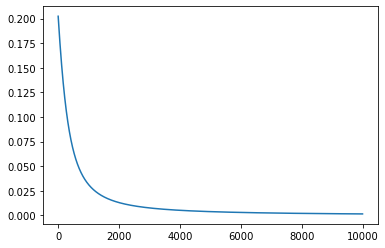

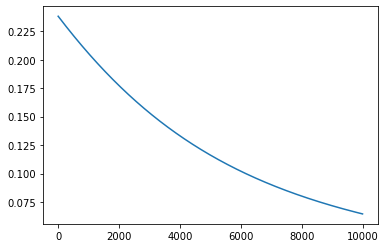

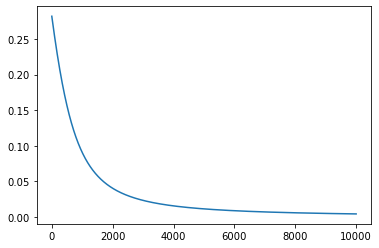

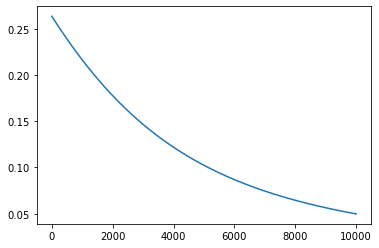

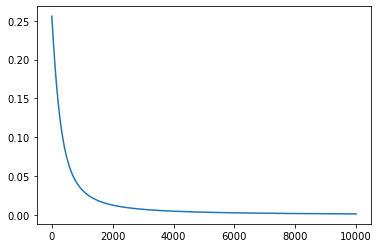

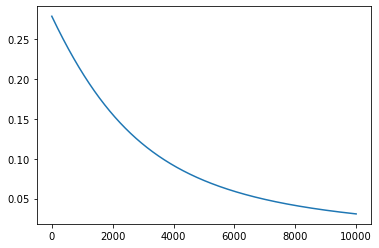

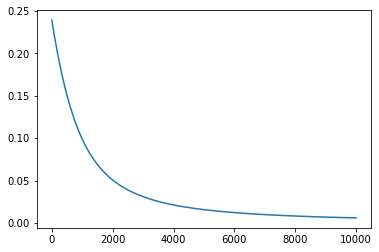

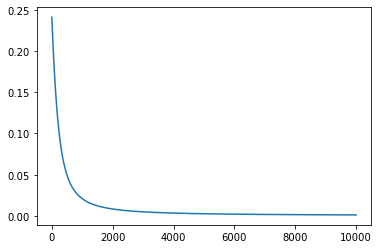

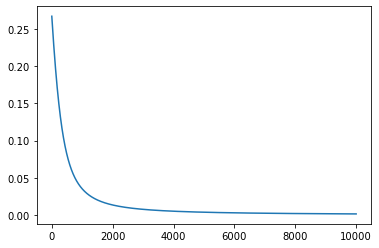

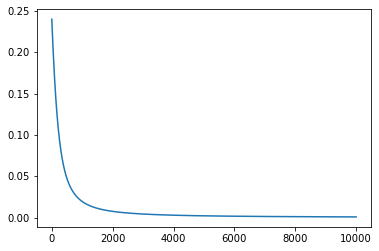

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

x1 = 0.05
x2 = 0.10
o1 = 0.01 
o2 = 0.99
#w = [0.15, 0.20, 0.25, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
w = []
for i in range(0, 12):
    # any random float between 50.50 to 500.50
    # don't use round() if you need number as it is
    x = round(random.uniform(0.001, 0.5), 3)
    w.append(x)
    
hidden = [0, 0, 0, 0, 0, 0]
b1 = 0.35
b2 = 0.60
n = 0.01

def squaredErrorFunction(w):
    def output(weight1, weight2, input1, input2, bias):
        net = weight1 * input1 + weight2 * input2 + bias
        return sigmoid(net)
    
    def sigmoid(net):
        return 1/(1+math.exp(-net))

    
    hidden[0] = output(w[0], w[1], x1, x2, b1)
    hidden[1] = output(w[2], w[3], x1, x2, b1)
    hidden[2] = output(w[4], w[5], hidden[0], hidden[1], b2)
    hidden[3] = output(w[6], w[7], hidden[0], hidden[1], b2)
    #hidden[4] = output1 , hidden[5] = output2
    hidden[4] = output(w[8], w[9], hidden[2], hidden[3], 0)
    hidden[5] = output(w[10], w[11], hidden[2], hidden[3], 0)

    eTotal1 = 1/2*math.pow((o1 - hidden[4]),2)
    #print("Eoutput1: ", eTotal1)
    eTotal2 = 1/2*math.pow((o2 - hidden[5]),2)
    #print("Eoutput2: ", eTotal2)

    if((eTotal1 == o1) and (eTotal2 == o2)):
        exit(1)

    eTotal = eTotal1 + eTotal2
    #print("Etotal: ", eTotal)
    return eTotal


#backpropagation

def deltaRule(target, out, outHidden):
    dError_dW = -(target - out)*out*(1-out)*outHidden
    return dError_dW

def decreasingError(w, dEtotal_dW):
    wrap = w - n * dEtotal_dW
    return wrap

def updateWeight():
    wu = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    global w
    
    def dEtotal_dw_input(p1, p2, hidden, x):
        return (p1+p2)*hidden*(1-hidden)*x
    
    dEtotal_dW9 = deltaRule(o1, hidden[4], hidden[2])
    dEtotal_dW10 = deltaRule(o1, hidden[4], hidden[3])
    dEtotal_dw11 = deltaRule(o2, hidden[5], hidden[2])
    dEtotal_dw12 = deltaRule(o2, hidden[5], hidden[3])
    wu[8] = decreasingError(w[8], dEtotal_dW9)
    wu[9] = decreasingError(w[9], dEtotal_dW10)
    wu[10] = decreasingError(w[10], dEtotal_dw11)
    wu[11] = decreasingError(w[11], dEtotal_dw12)
    
    
    
    
    dEtotal_dW5 = deltaRule(o1, hidden[2], hidden[0])
    dEtotal_dW6 = deltaRule(o1, hidden[2], hidden[1])
    dEtotal_dw7 = deltaRule(o2, hidden[3], hidden[0])
    dEtotal_dw8 = deltaRule(o2, hidden[3], hidden[1])
    
    
    wu[4] = decreasingError(w[4], dEtotal_dW5)
    wu[5] = decreasingError(w[5], dEtotal_dW6)
    wu[6] = decreasingError(w[6], dEtotal_dw7)
    wu[7] = decreasingError(w[7], dEtotal_dw8)

    #w5
    p51 = deltaRule(o1, hidden[4],w[8])
    p52 = deltaRule(o2, hidden[5],w[10])
    
    #w6
    p61 = deltaRule(o1, hidden[4], w[8])
    p62 = deltaRule(o2, hidden[5], w[10])
    
    #w7
    p71 = deltaRule(o1, hidden[4], w[9])
    p72 = deltaRule(o2, hidden[5], w[11])
    
    #w8
    p81 = deltaRule(o1, hidden[4], w[9])
    p82 = deltaRule(o2, hidden[5], w[11])
    
    dEtotal_dW5 = dEtotal_dw_input(p51, p52, hidden[2], hidden[0])
    dEtotal_dW6 = dEtotal_dw_input(p61, p62, hidden[2], hidden[1])
    dEtotal_dW7 = dEtotal_dw_input(p71, p72, hidden[3], hidden[0])
    dEtotal_dW8 = dEtotal_dw_input(p81, p82, hidden[3], hidden[1])

    
    #w1
    p1 = deltaRule(hidden[4], hidden[2], w[4])
    p2 = deltaRule(hidden[5], hidden[3], w[6])

    #w2
    p3 = deltaRule(hidden[4], hidden[2], w[4])
    p4 = deltaRule(hidden[5], hidden[3], w[6])

    #w3
    p5 = deltaRule(hidden[4], hidden[2], w[5])
    p6 = deltaRule(hidden[5], hidden[3], w[7])

    #w4 
    p7 = deltaRule(hidden[4], hidden[2], w[5])
    p8 = deltaRule(hidden[5], hidden[3], w[7])

    

    dEtotal_dW1 = dEtotal_dw_input(p1, p2, hidden[0], x1)
    dEtotal_dW2 = dEtotal_dw_input(p3, p4, hidden[0], x2)
    dEtotal_dW3 = dEtotal_dw_input(p5, p6, hidden[1], x1)
    dEtotal_dW4 = dEtotal_dw_input(p7, p8, hidden[1], x2)
    
    #update w for input to hidden 1 layer
    wu[0] = decreasingError(w[0], dEtotal_dW1)
    wu[1] = decreasingError(w[1], dEtotal_dW2)
    wu[2] = decreasingError(w[2], dEtotal_dW3)
    wu[3] = decreasingError(w[3], dEtotal_dW4)
    wu[4] = decreasingError(w[4], dEtotal_dW5)
    wu[5] = decreasingError(w[5], dEtotal_dW6)
    wu[6] = decreasingError(w[6], dEtotal_dW7)
    wu[7] = decreasingError(w[7], dEtotal_dW8)

    return wu;


for i in range(10):
    w = []
    for i in range(0, 12):
        # any random float between 50.50 to 500.50
        # don't use round() if you need number as it is
        i = round(random.uniform(0.001, 0.5), 3)
        w.append(i)
    nResult = []
    nRange = []
    n = random.uniform(0.001, 0.05)
    print("learning rate:= ", n)
    print("weights:= ", w)
    for x in range(10000):
        result = squaredErrorFunction(w)
        #print(result)
        nRange.append(x)
        nResult.append(result)
        w = updateWeight()
    print()

    fig, ax = plt.subplots()
    ax.plot(nRange, nResult)
    


